# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os

In [2]:
# Set up path for windows user, not required for Mac user.
my_path = os.path.abspath('C:/Users/kudab/Desktop/Chromedriver_win32/chromedriver.exe')
my_service = Service(executable_path=my_path)

In [3]:
#Set up Splinter for windows user.
browser = Browser('chrome', service=my_service)

# Set up Splinter for Mac user
# browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_soup = soup(html, 'html.parser')

In [7]:
# Extract all rows of data
# Find the table that contains all the rows
mars_table= mars_weather_soup.find('table', class_="table")
# Extract rows
mars_rows = mars_table.find_all('tr')
mars_rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list

# first differentiate heading from the table

header = mars_rows[0] # first item in the table is header row

all_otherrows = mars_rows[1:] # All other item in the table becomes the rest of the rows

headings = []# list for heading

# Loop through the scraped data to create a list of rows

# First loop through all th elements to get the headings
for head in header.find_all('th'):    
    # Convert the th elements to text
    head = (head.text)    
    # Append the column name to headings
    headings.append(head)
    
    
# Now loop through the rest of the rows:
all_rows = []# list for all rows

for row_num in range(len(all_otherrows)):# one row at a time    
    row = []# holds entries for one row    
    for row_item in all_otherrows[row_num].find_all('td'):        
        # Convert the td element to text        
        row_item = (row_item.text)        
        # Append row_item to row        
        row.append(row_item)
        
    # Append row to all_rows    
    all_rows.append(row)    

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df= pd.DataFrame(columns=headings, data=all_rows)


In [10]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
mars_weather_df['terrestrial_date']= mars_weather_df['terrestrial_date'].astype('datetime64[ns]')
mars_weather_df = mars_weather_df.astype({'id': 'int', 
                                         'sol': 'int', 
                                         'ls': 'float', 
                                         'month': 'int', 
                                         'min_temp': 'float', 
                                         'pressure': 'float'})
               

In [14]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 80.3 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_month =  mars_weather_df['month'].nunique()
print(f'There are {mars_month} month on Mars.')

There are 12 month on Mars.


In [17]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_weather_df['sol'].nunique()
print(f'There are {martian_days} Martian days worth of data in the dataset.')

There are 1867 Martian days worth of data in the dataset.


In [18]:
# 3. What is the average low temperature by month?
# Hint groupby month
mars_avg_temp = mars_weather_df.groupby(["month"])
mars_month_avg_temp= mars_avg_temp.mean().loc[:,["min_temp"]]
mars_month_avg_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


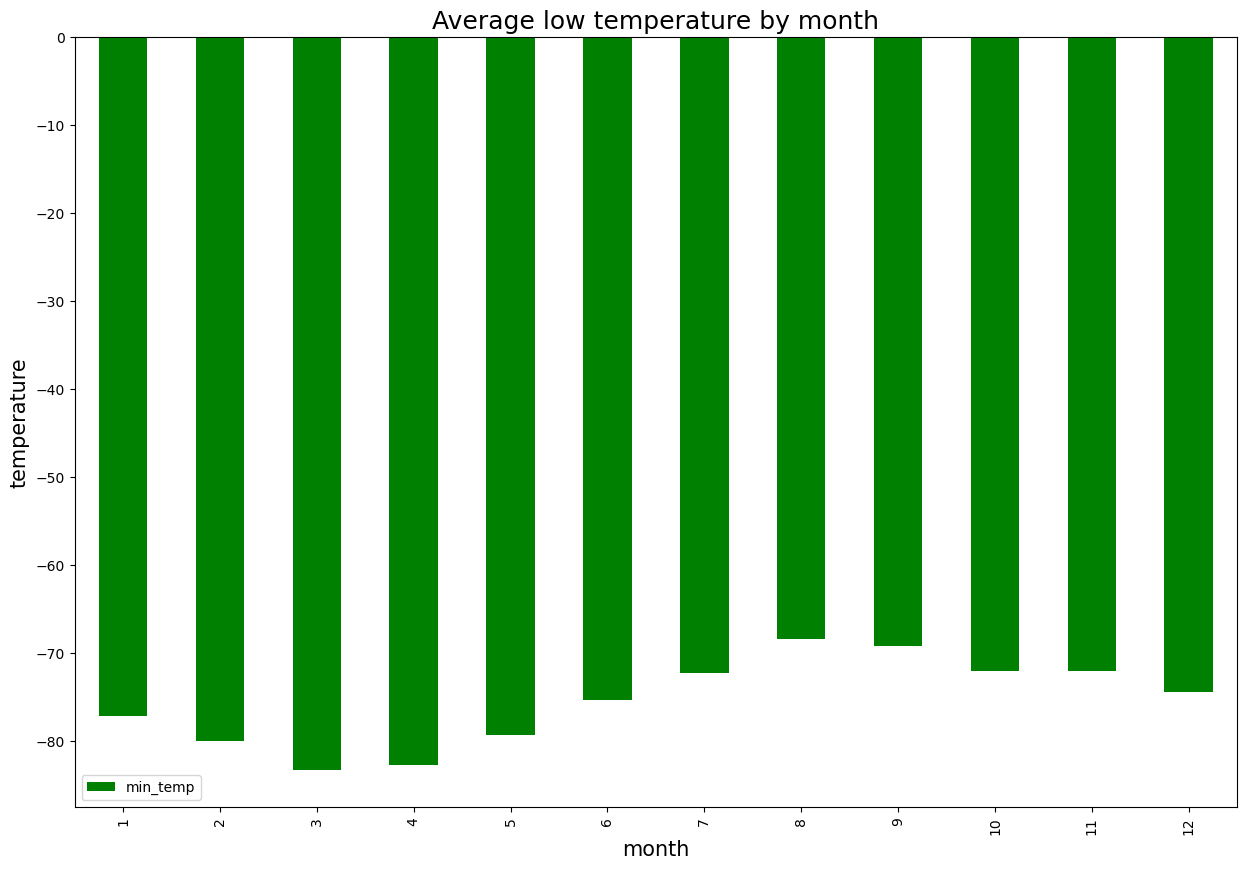

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the average temperature by month
plot_mars_month_avg_temp = mars_month_avg_temp.plot.bar(color='g', figsize=(15,10))

# Set a title for the chart
plt.title("Average low temperature by month", fontsize=18)
plt.xlabel("month", fontsize=15)
plt.ylabel("temperature", fontsize =15)
plt.show()
plt.tight_layout()

In [20]:
# Identify the coldest and hottest months in Curiosity's location
# From the bar graph above, the coldest month is the third month which has avg low temp of -83.30729
coldest_temp = mars_month_avg_temp['min_temp'].min()
coldest_month = mars_month_avg_temp.loc[mars_month_avg_temp['min_temp']== coldest_temp]
coldest_month


,min_temp
month,
3,-83.307292


In [21]:
# From the bar graph above, the hottest month is the eighth month which has avg low temp of -68.32978
hottest_temp = mars_month_avg_temp['min_temp'].max()
hottest_month = mars_month_avg_temp.loc[mars_month_avg_temp['min_temp']== hottest_temp]
hottest_month


,min_temp
month,
8,-68.382979


In [22]:
# 4. Average pressure by Martian month
mars_avg_pres = mars_weather_df.groupby(["month"])
mars_month_avg_pres= mars_avg_pres.mean().loc[:,["pressure"]]
mars_month_avg_pres

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


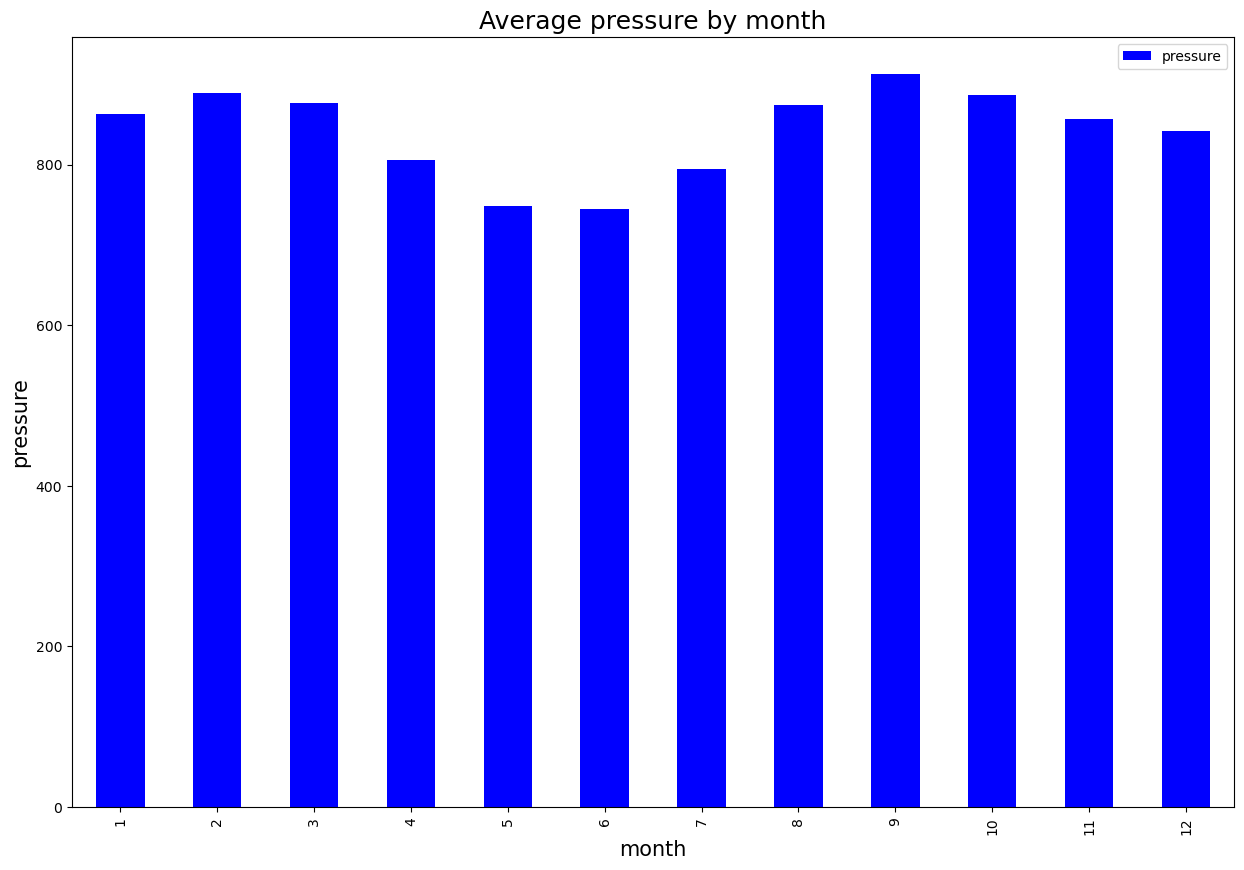

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the average pressure by month
plot_mars_month_avg_pres = mars_month_avg_pres.plot.bar(color='b', figsize=(15,10))

# Set a title for the chart
plt.title("Average pressure by month", fontsize=18)
plt.xlabel("month", fontsize=15)
plt.ylabel("pressure", fontsize =15)
plt.show()
plt.tight_layout()

In [24]:
# The sixth month has the lowest atmospheric pressure based on the graph above
low_atmos_pres= mars_month_avg_pres['pressure'].min()
low_atmos_pres_month = mars_month_avg_pres.loc[mars_month_avg_pres['pressure']== low_atmos_pres]
low_atmos_pres_month


,pressure
month,
6,745.054422


In [25]:
# The ninth month has the highest atmospheric pressure based on the garap above
high_atmos_pres = mars_month_avg_pres['pressure'].max()
high_atmos_pres_month = mars_month_avg_pres.loc[mars_month_avg_pres['pressure']== high_atmos_pres]
high_atmos_pres_month

,pressure
month,
9,913.30597


In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# First find initial sun longitude
initial_long = mars_weather_df['ls'].loc[0]

# Based on research, sun longitude will be the same after approximately one Martial year.
# So, find the remaining rows where the longitude is same as the initial_long
same_as_initial = mars_weather_df.loc[mars_weather_df['ls']==initial_long]
same_as_initial

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
598,621,2014-07-03,678,155.0,6,-77.0,739.0
599,624,2014-07-04,679,155.0,6,-77.0,738.0
1249,1274,2016-05-20,1346,155.0,6,-75.0,737.0
1250,1277,2016-05-21,1347,155.0,6,-75.0,736.0


In [27]:
# Now find the earth date of the initial sun longitude
first_earth_date = same_as_initial['terrestrial_date'].loc[0]

# Find the next earth date, which is the date after one Martial year
one_martial_year = same_as_initial['terrestrial_date'].iloc[1]

# To calculate the Earth days in a Martian year, you subtract first earth date from the next earth date
earth_days = one_martial_year - first_earth_date
earth_days

Timedelta('686 days 00:00:00')

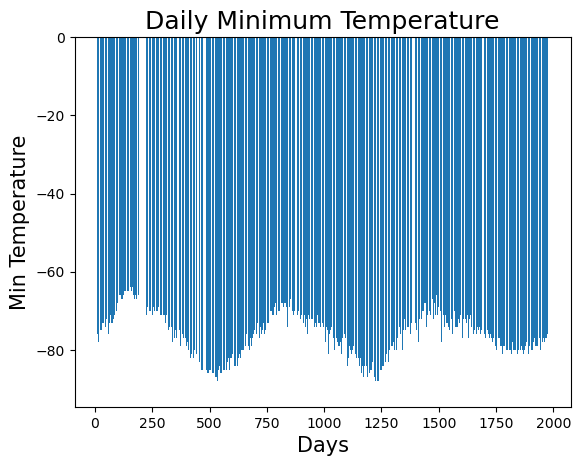

<Figure size 640x480 with 0 Axes>

In [28]:
# Visually estimate the result by plotting the daily minimum temperature
plot_daily_mintemp = plt.bar(mars_weather_df['sol'], mars_weather_df['min_temp'])

# Set a title for the chart
plt.title("Daily Minimum Temperature", fontsize=18)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Min Temperature", fontsize =15)
plt.show()
plt.tight_layout()

Based on the graph above, the peak to peak distance is approximately 1225-550 (675 days) or it can also be interpreted as the Mars circles the sun 3 times in 2000 days which means a year on Mars is approximately 666.7 earth days and its almost close to 686 earth days calculated above.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_fact.csv', index=False)

In [ ]:
browser.quit()